<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [171]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [45]:
sleep=pd.read_csv("/Users/mkrupoff/Desktop/ECON628-01/datasets/sleep/sleep_bh.csv")

In [46]:
sleep.shape

(706, 34)

In [58]:
sleep.head()

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [47]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [70]:
sleep.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [49]:
sleep = sleep[np.isfinite(sleep["lhrwage"])]

#http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan

In [71]:
sleep.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

In [52]:
sleep.shape

(532, 34)

In [55]:
sleep.describe().T
#All 14 dummy variables are in binary format (1,0)

,count,mean,std,min,25%,50%,75%,max
age,532.0,38.317669,11.232965,23.000000,29.000000,36.000000,47.000000,65.000000
black,532.0,0.050752,0.219697,0.000000,0.000000,0.000000,0.000000,1.000000
case,532.0,266.500000,153.719441,1.000000,133.750000,266.500000,399.250000,532.000000
clerical,532.0,0.182331,0.386480,0.000000,0.000000,0.000000,0.000000,1.000000
construc,532.0,0.030075,0.170955,0.000000,0.000000,0.000000,0.000000,1.000000
educ,532.0,12.731203,2.693566,1.000000,12.000000,12.000000,15.000000,17.000000
earns74,532.0,9703.947368,8214.777772,0.000000,3500.000000,8250.000000,13750.000000,42500.000000
gdhlth,532.0,0.885338,0.318913,0.000000,1.000000,1.000000,1.000000,1.000000
inlf,532.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
leis1,532.0,4659.988722,892.359993,2090.000000,4102.750000,4595.000000,5112.750000,7335.000000


## 3. Check for correlations
    Implement a correlation heatmap
---

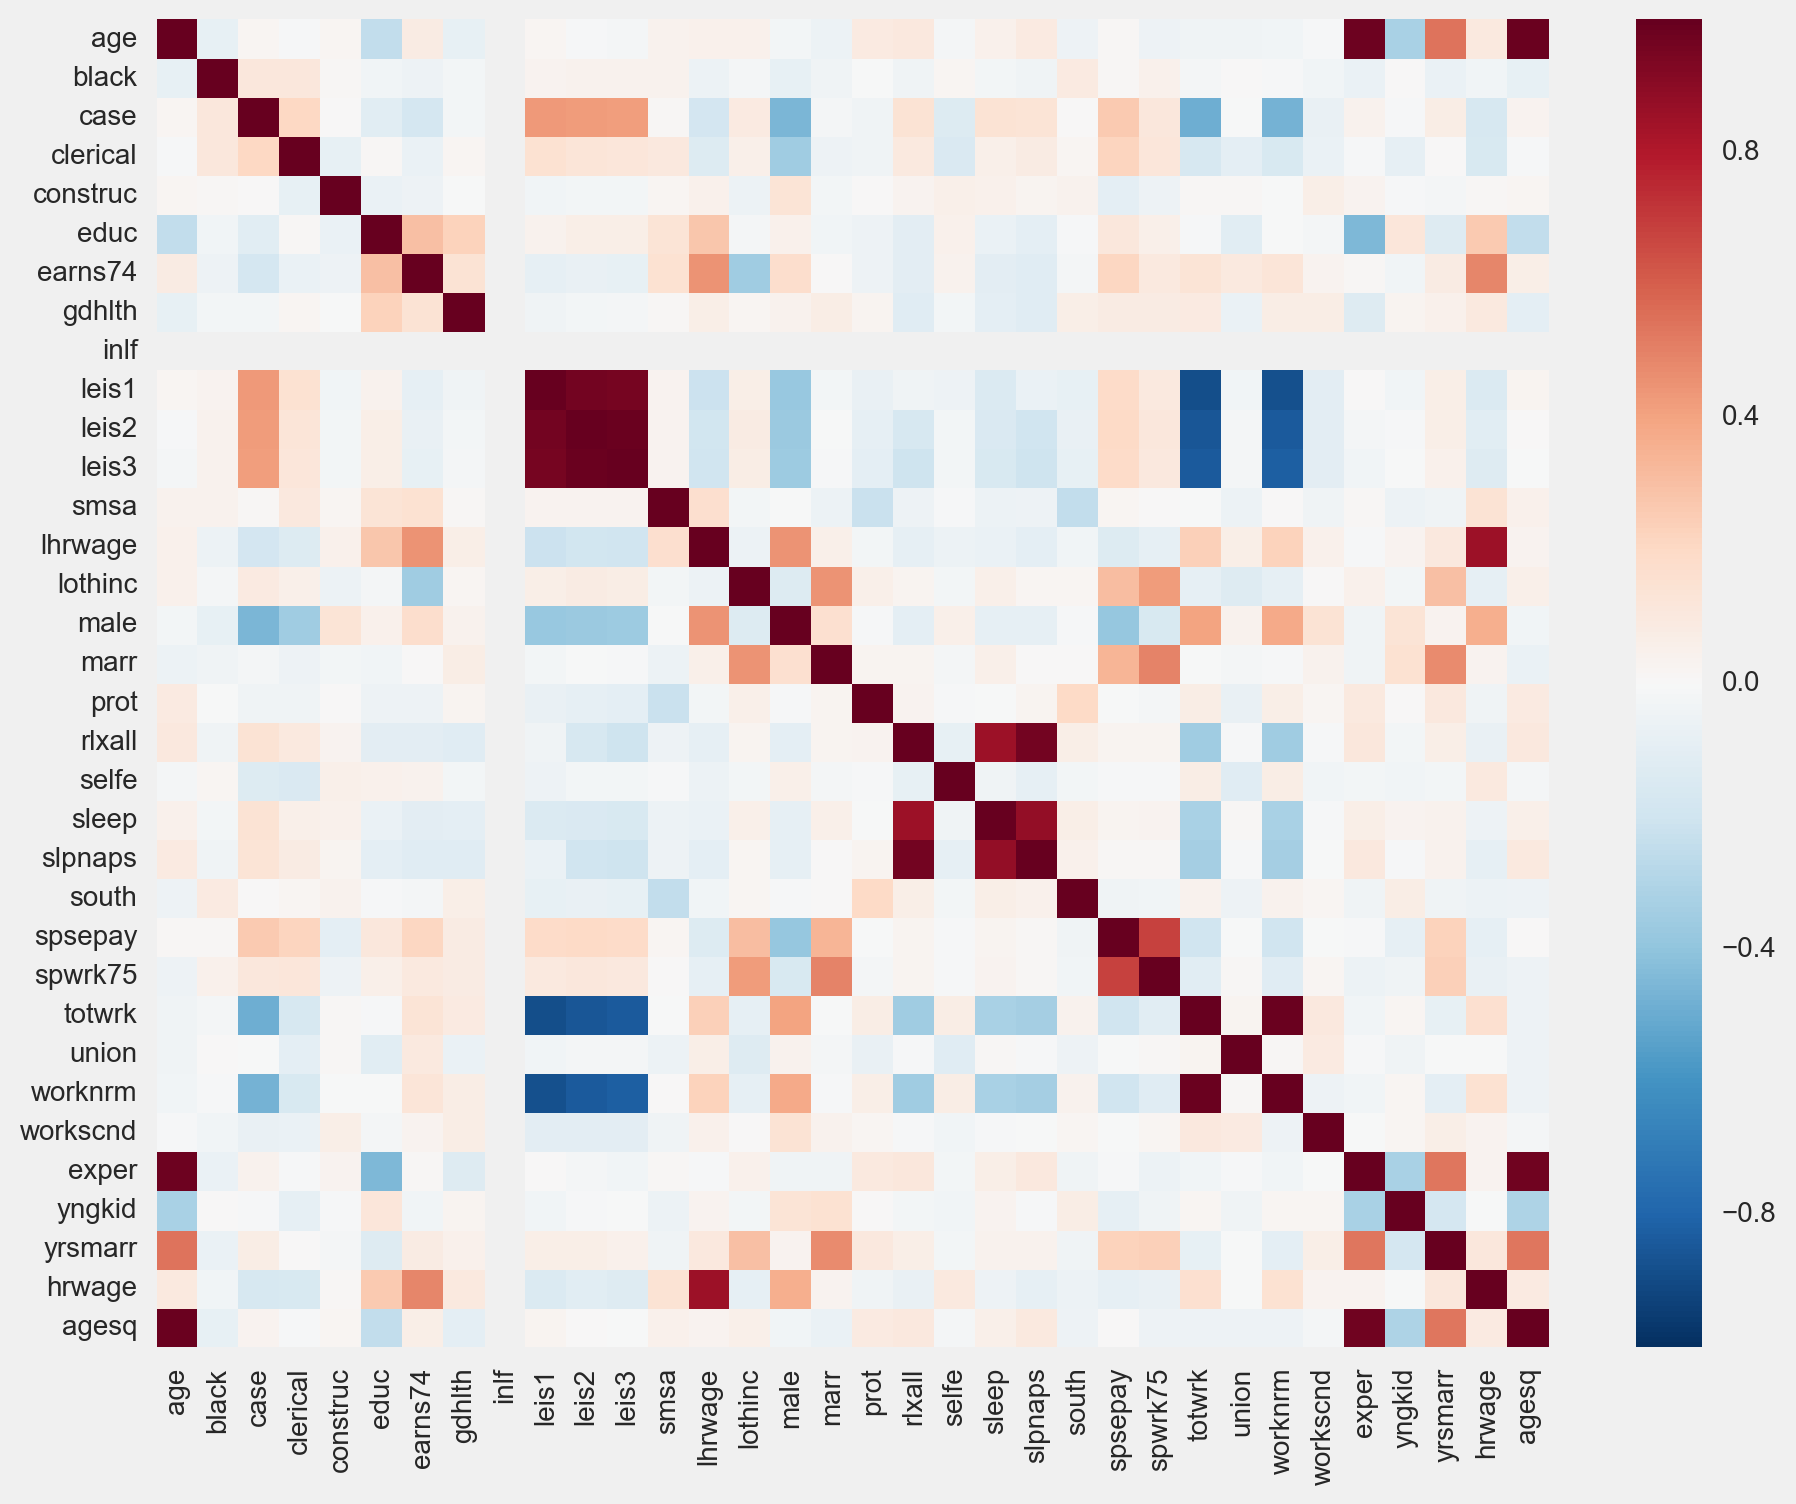

In [56]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.heatmap(sleep.corr(), ax=ax)`
plt.show()

In [60]:
sleep["rlxall"].describe()

count     532.000000
mean     3430.248120
std       517.854162
min      1605.000000
25%      3118.750000
50%      3418.000000
75%      3691.250000
max      6110.000000
Name: rlxall, dtype: float64

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [155]:
from patsy import dmatrices
import statsmodels.formula.api as smf
import patsy
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 



I chose to exclude case, slpnaps, rlxall, leis1, leis2, and leis3. I am excluding these variables because they would be highly collinear with the sleep variable wthout offering much explanatory sense. 

In [79]:
#Constructed dep and independent dfs
y=sleep["sleep"]
columns_= sleep.columns.tolist()
exclude_col=["sleep", "case", "lothinc" "slpnaps", "rlxall", "leis1","leis2", "leis3", "inlf"]
X= sleep[[i for i in columns_ if i not in exclude_col]]

print (y.shape) 
print (X.shape)

(532,)
(532, 27)


In [156]:
ss = StandardScaler() 

Xn = ss.fit_transform(X)

In [158]:
#Train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.30, random_state=10)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

(372, 27) (160, 27) (372,) (160,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [ ]:
from sklearn.cross_validation import cross_val_score



In [159]:
lm = linear_model.LinearRegression()
model = lm.fit(Xtrain, ytrain)

In [160]:
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

('Coefficients:', array([ -3.37071156e+00,   2.90831750e+00,  -6.55942631e+00,
         1.38264345e+01,   2.66847352e+00,   1.04429685e+01,
         1.20196518e+01,  -1.22862735e+01,  -1.50691107e+01,
         1.02205911e+01,  -1.84819435e+01,   3.10009851e+01,
        -2.80215274e+01,   6.00018105e+00,   3.92346806e+02,
         6.99967559e+00,  -5.94985691e+00,  -3.97192163e+00,
        -4.50799558e-02,   1.13780208e+01,   1.26193964e+00,
        -8.25690339e+00,  -3.69622099e+00,   2.05737230e+01,
        -7.77570562e+00,   2.05495615e+01,   3.12571049e+00]))
('Intercept:', 3257.0760863216992)


In [238]:
ytrain_pred = lm.predict(Xtrain)
ytest_pred = lm.predict(Xtest)
linreg_scores = cross_val_score(lm, Xtrain, ytrain, cv=10)



In [239]:

print linreg_scores


print ("R^2:", model.score(Xtrain, ytrain))
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

[ 0.77426245  0.83212239  0.67629556  0.91027423  0.68631941  0.84438318
  0.78974254  0.58280992  0.66059314  0.90933079]
('R^2:', 0.80945734619739551)
Average R^2 OLS score: 0.767


In [241]:
print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred),
        mean_squared_error(ytest, ytest_pred)))
print('R^2 - OLS train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

MSE - OLS train: 35837.145, test: 48151.879
R^2 - OLS train: 0.809, test: 0.731


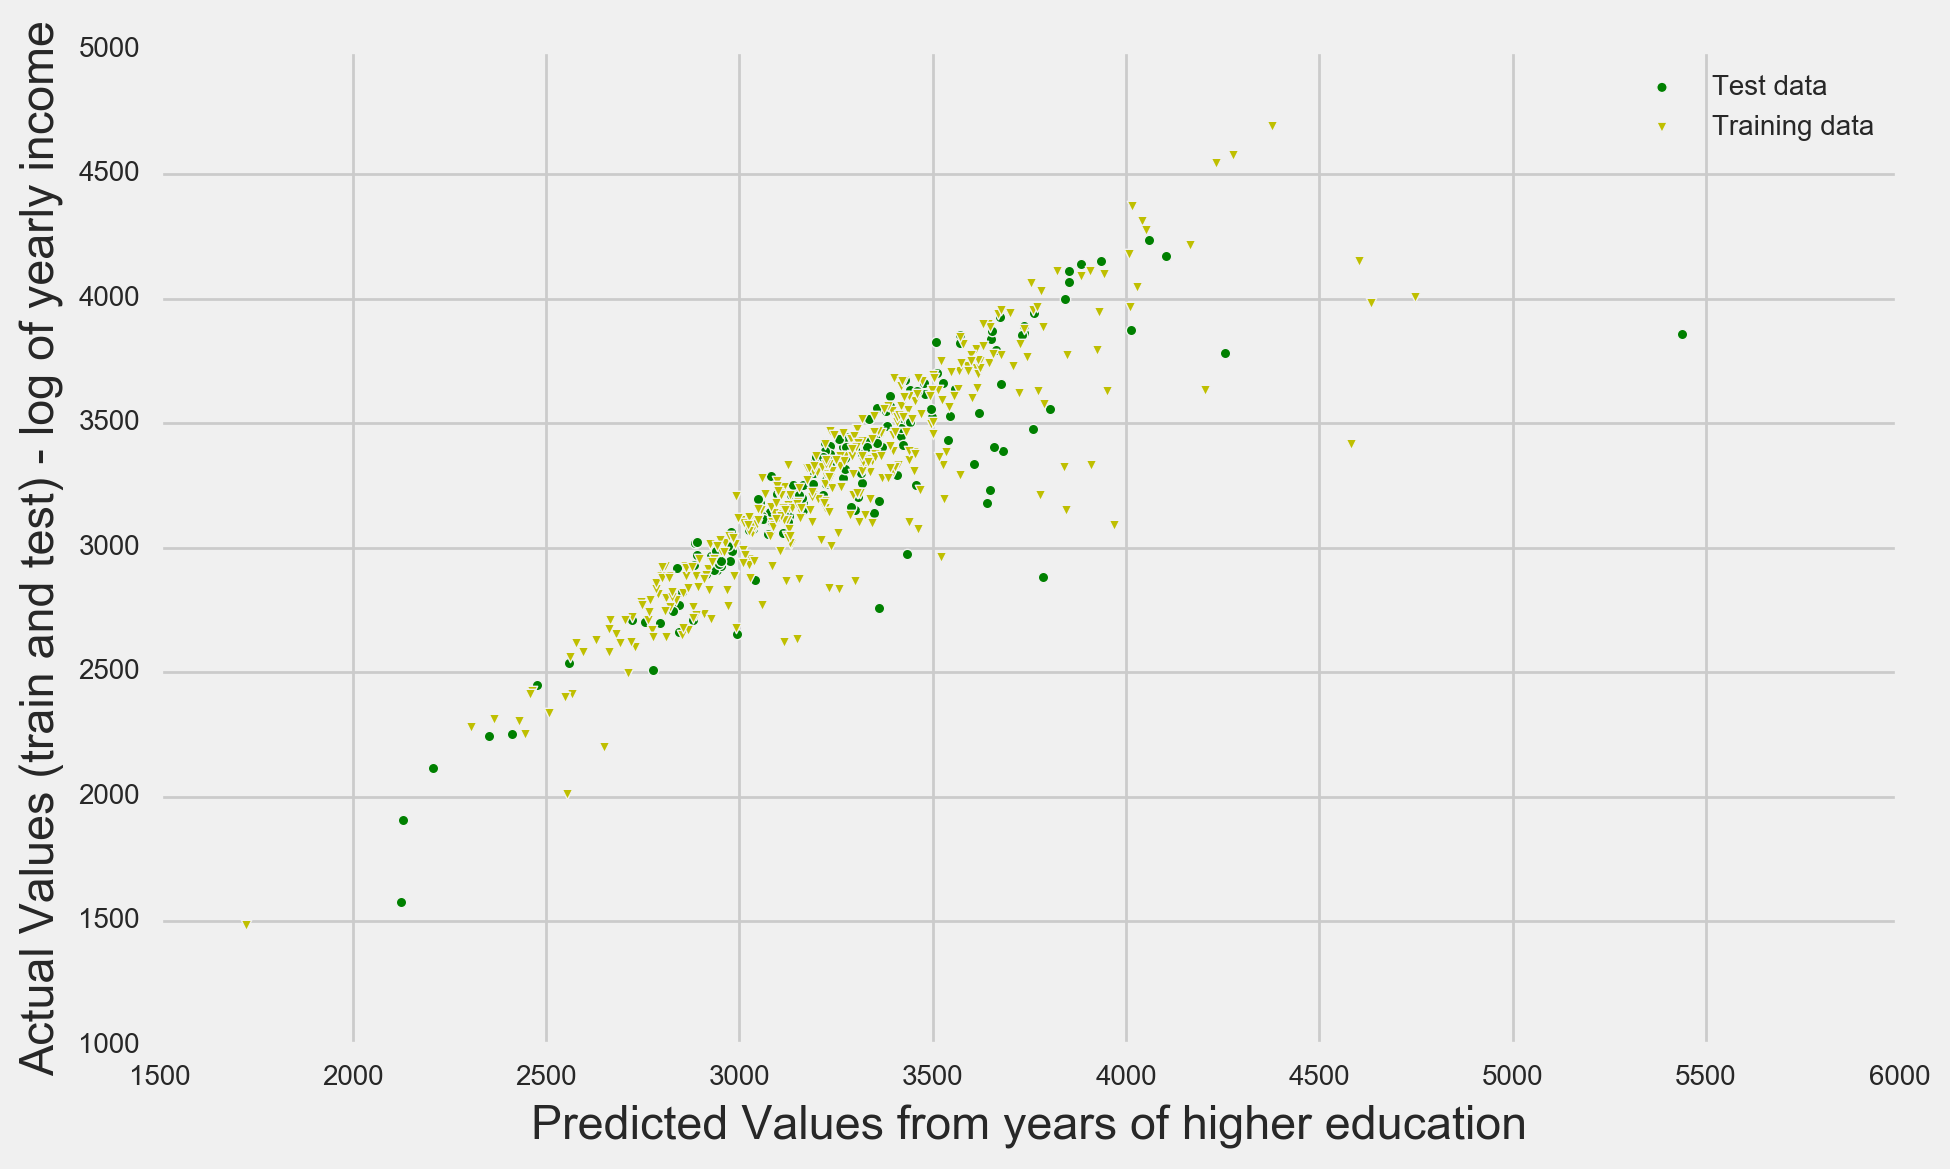

In [163]:
#OLS, CV, Normalization and Regularization 2/27/17



fig = plt.figure(figsize=(10,6))
plt.scatter(ytest_pred, ytest, s=14, c='g', marker='o', label='Test data')
plt.scatter(ytrain_pred, ytrain, s=14, c='y', marker='v', label='Training data')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values (train and test) - log of yearly income")
plt.legend(loc='upper right')
plt.show()

## 4.2.2 Regularization
    
---

In [164]:
from patsy import dmatrices
import patsy

print (y.shape)
print (Xn.shape)


(532,)
(532, 27)


In [167]:
#OLS, CV, Normalization and Regularization 2/27/17


#Set up the log space
ridge_alphas = np.logspace(0, 5, 200)

#Find the optimal ridge
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)

optimal_ridge.fit(Xtrain, ytrain)
print (optimal_ridge.alpha_)


9.54771611421


In [169]:
#OLS, CV, Normalization and Regularization 2/27/17


ridge = Ridge(alpha=optimal_ridge.alpha_)

## Here we are fitting the Ridge regression

ridge.fit(Xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)
# print(ridge.coef_)
# print "=====\n"


## Here we are cross validating at cv = 10
ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)

print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))


[ 0.77827098  0.83321788  0.69340677  0.90379342  0.68229134  0.83805699
  0.78349645  0.59265008  0.67635118  0.90857156]
Average R^2 Ridge score: 0.769


In [235]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_ridge),
        mean_squared_error(ytest, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_ridge),
        r2_score(ytest, ytest_pred_ridge)))

MSE - Ridge train: 35965.398, test: 47121.779
R^2 - Ridge train: 0.809, test: 0.736


Lasso

In [173]:
#OLS, CV, Normalization and Regularization 2/27/17


optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

12.4302065897


................................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished


In [174]:
#OLS, CV, Normalization and Regularization 2/27/17


lasso = Lasso(alpha=optimal_lasso.alpha_)

## Here I am fitting the regression with the lasso specification.
lasso.fit(Xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(Xtrain)
ytest_pred_lasso = lasso.predict(Xtest)


lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

[ 0.78485183  0.83683785  0.70184756  0.90926639  0.667154    0.8574967
  0.83430644  0.62161514  0.69896238  0.92681871]
Average R^2 Lasso score: 0.784


In [234]:
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_lasso),
        mean_squared_error(ytest, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_lasso),
        r2_score(ytest, ytest_pred_lasso)))

MSE - Lasso train: 37809.173, test: 46373.738
R^2 - Lasso train: 0.799, test: 0.741


In [ ]:
#Elastic Net

In [176]:
#OLS, CV, Normalization and Regularization 2/27/17


l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=10,
                            verbose=1)
optimal_enet.fit(Xtrain, ytrain)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_



........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

12.6040604617
1.0


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [177]:
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

12.6040604617
1.0


In [179]:
#OLS, CV, Normalization and Regularization 2/27/17


enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit model with the Elastic Net specification model
enet.fit(Xtrain, ytrain)

#predict train and test
ytrain_pred_enet = enet.predict(Xtrain)
ytest_pred_enet = enet.predict(Xtest)


## Cross validate the scores 10 times and print the mean of the scores
enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

[ 0.78476957  0.83668299  0.70201804  0.90911586  0.66694716  0.85750144
  0.83430689  0.6216946   0.69944291  0.92677175]
Average R^2 ElasticNet score: 0.784


In [233]:
#OLS, CV, Normalization and Regularization 2/27/17


print('MSE - ElasticNet train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_enet),
        mean_squared_error(ytest, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_enet),
        r2_score(ytest, ytest_pred_enet)))

MSE - ElasticNet train: 37827.012, test: 46360.021
R^2 - ElasticNet train: 0.799, test: 0.741


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [224]:
#OLS, CV, Normalization and Regularization 

def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    '''you can change the number inside head to display more or less variables'''
    return method_coefs.head(10)






In [190]:
best_reg_method(X, lasso)



,abs_coef,coef,variable
14,376.085503,376.085503,slpnaps
11,12.170109,12.170109,marr
23,11.345692,11.345692,yngkid
12,11.244117,-11.244117,prot
0,0.000000,-0.000000,age
15,0.000000,0.000000,south
25,0.000000,0.000000,hrwage
24,0.000000,-0.000000,yrsmarr
22,0.000000,-0.000000,exper
21,0.000000,-0.000000,workscnd


In [187]:
best_reg_method(X, enet)



,abs_coef,coef,variable
14,375.889830,375.889830,slpnaps
11,12.007558,12.007558,marr
23,11.184288,11.184288,yngkid
12,11.051147,-11.051147,prot
0,0.000000,-0.000000,age
15,0.000000,0.000000,south
25,0.000000,0.000000,hrwage
24,0.000000,-0.000000,yrsmarr
22,0.000000,-0.000000,exper
21,0.000000,-0.000000,workscnd


In [186]:
best_reg_method(X, ridge)

,abs_coef,coef,variable
14,379.848772,379.848772,slpnaps
11,29.819860,29.819860,marr
12,26.102459,-26.102459,prot
23,20.071119,20.071119,yngkid
25,18.515907,18.515907,hrwage
10,17.240048,-17.240048,male
3,13.265946,13.265946,construc
8,12.191978,-12.191978,lhrwage
7,12.140415,-12.140415,smsa
19,11.151529,11.151529,union


In [189]:
best_reg_method(X, lm)

,abs_coef,coef,variable
14,392.346806,392.346806,slpnaps
11,31.000985,31.000985,marr
12,28.021527,-28.021527,prot
23,20.573723,20.573723,yngkid
25,20.549561,20.549561,hrwage
10,18.481944,-18.481944,male
8,15.069111,-15.069111,lhrwage
3,13.826434,13.826434,construc
7,12.286273,-12.286273,smsa
6,12.019652,12.019652,gdhlth


The following variables are the best predictors:
slpnaps
marr
yngkid
prot

According to the lasso and elastic net methods, these are the only predictors with a non-zero coefficient.

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

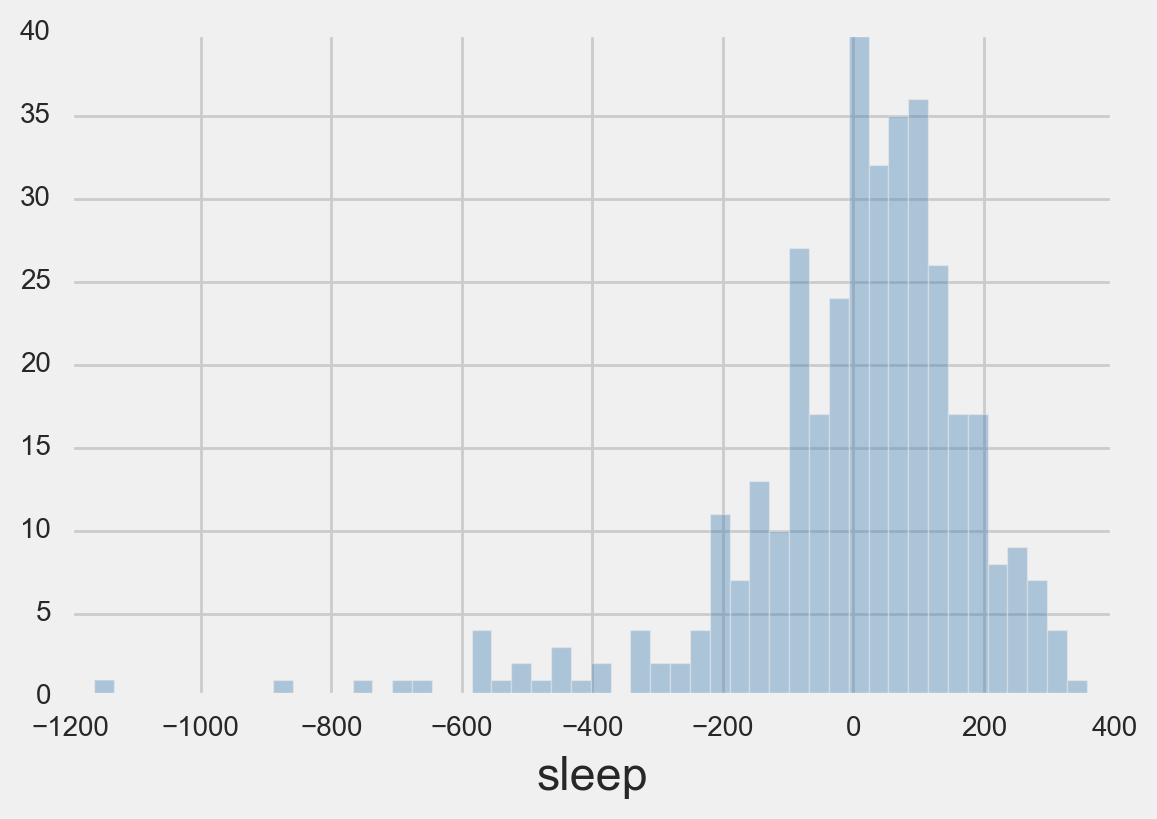

In [202]:

def resid_plot(model, ytrain, ytrain_pred):
    model  = ytrain - ytrain_pred


    sns.distplot(model, bins=50, hist=True, kde=False, 
                 color='steelblue', label=model)
    plt.show()

resid_plot(lm,ytrain,ytrain_pred )

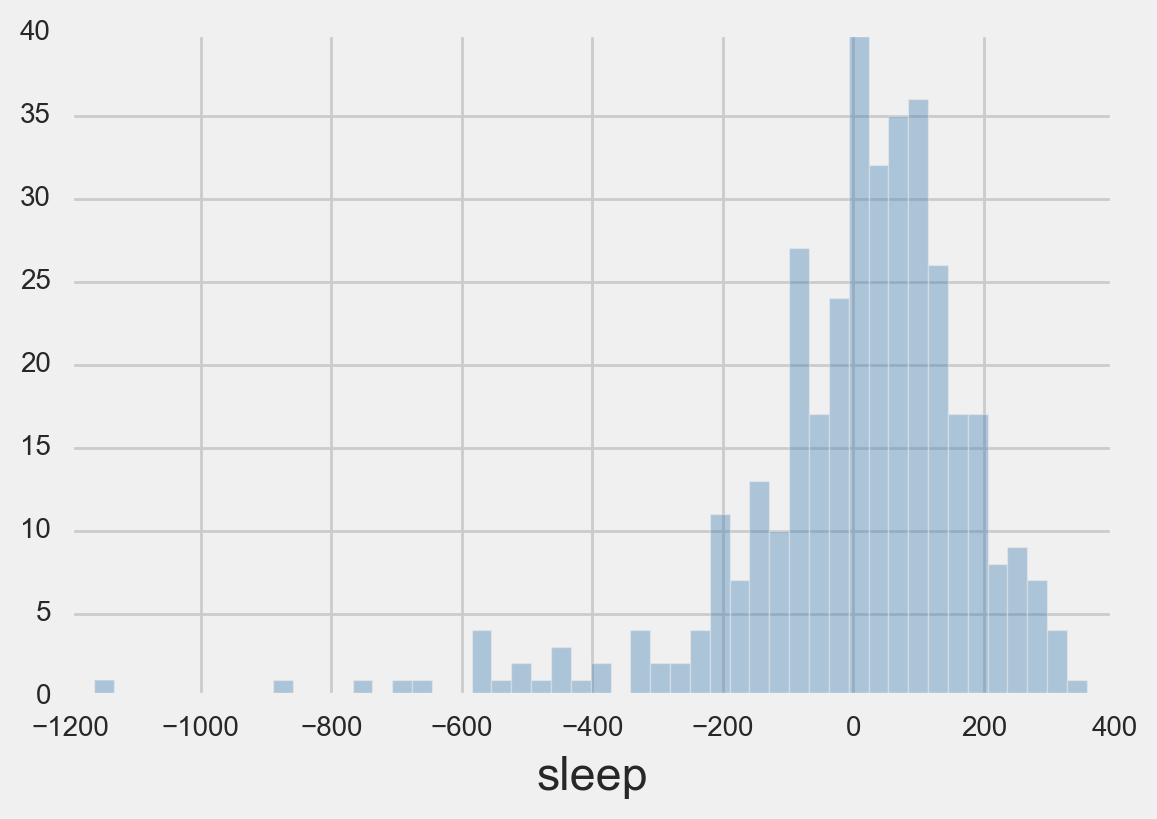

In [203]:
resid_plot(ridge,ytrain,ytrain_pred )

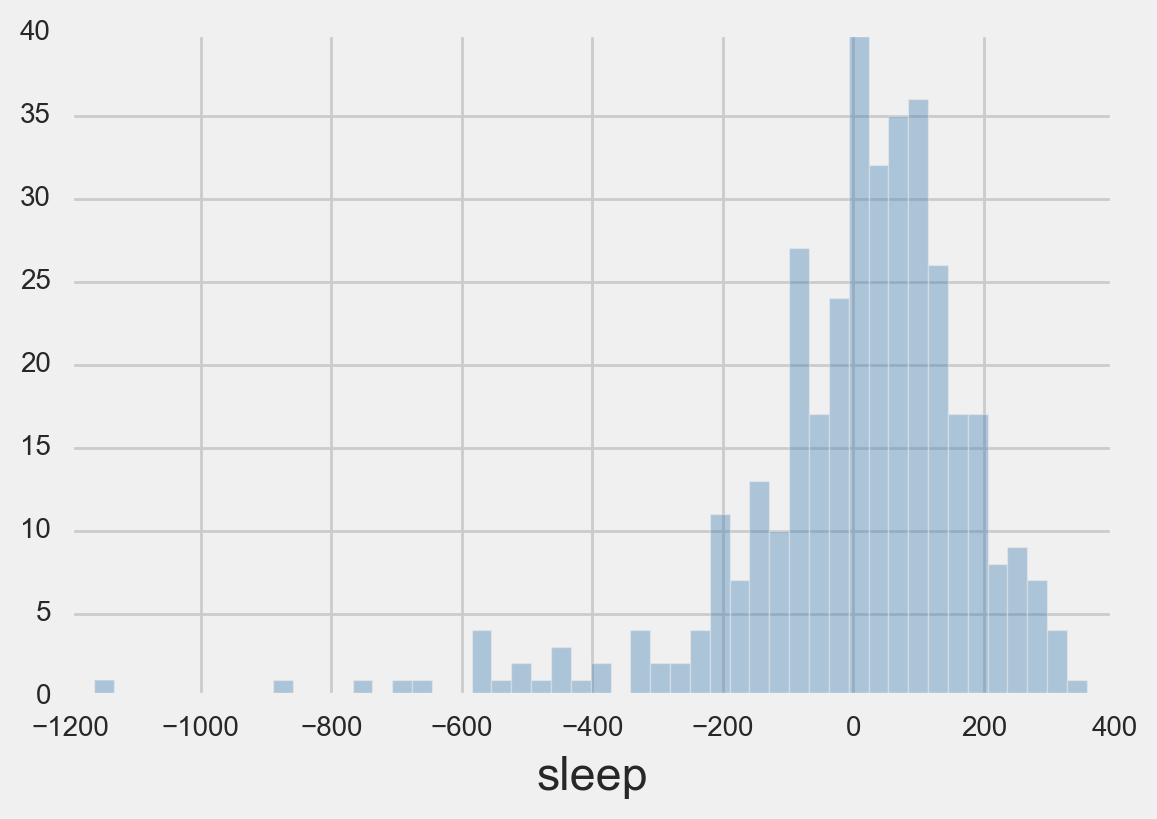

In [204]:
resid_plot(lasso,ytrain,ytrain_pred )

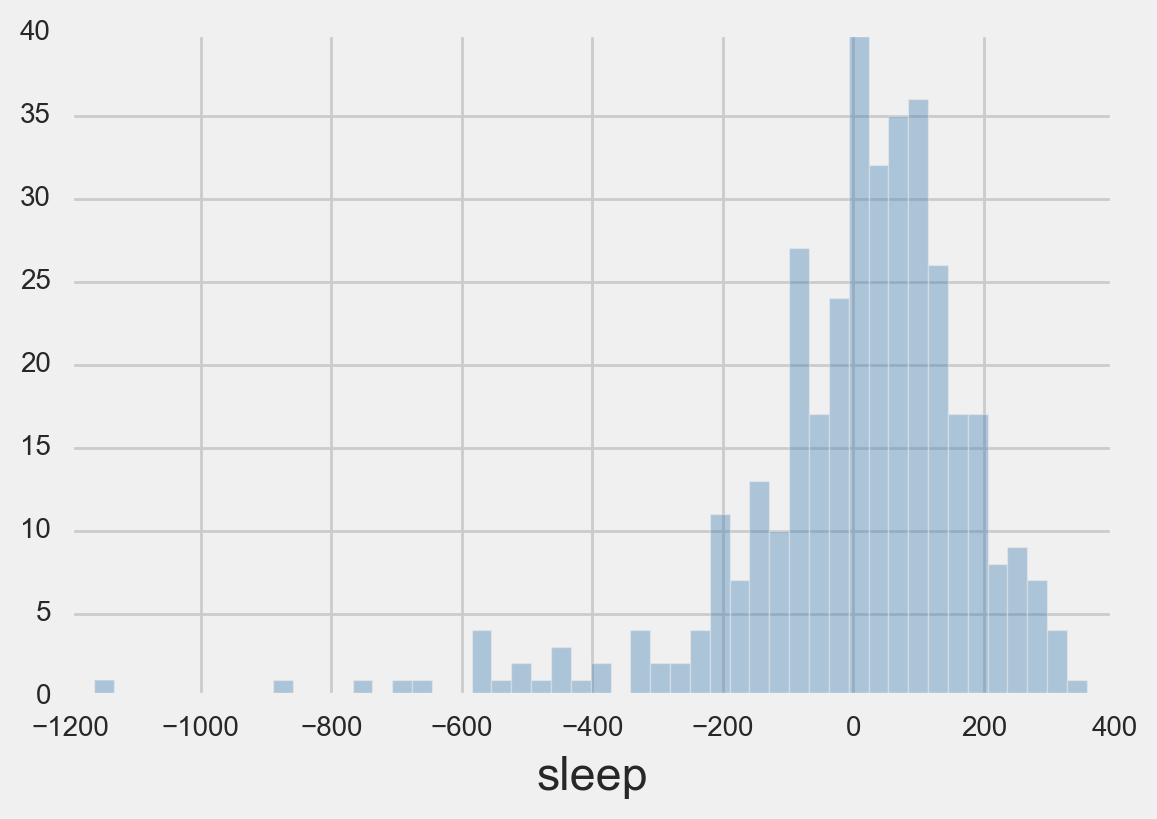

In [205]:
resid_plot(ridge,ytrain,ytrain_pred )

In [ ]:
 sns.distplot(ridge_resd_train, bins=50, hist=True, kde=False, 
                 color='darkred', ax=axarr[1], label='Ridge residuals')


    sns.distplot(lasso_resd_train, bins=50, hist=True, kde=False, 
                 color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

    sns.distplot(enet_resd_train, bins=50, hist=True, kde=False, 
                 color='g', ax=axarr[3], label='ElasticNet residuals')

    plt.show()




## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [207]:
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3)

## Print shapes of X(s) and y(s)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(372, 27) (372,)
(160, 27) (160,)


In [209]:
#Regression Tree, Random Forest and Features Importance demo 2/27/17
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)


In [210]:
dtr_gs.fit(X_train, y_train)
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10}


best score 0.731492863411


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.4s finished


In [214]:
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 2938.02439024,  2938.02439024,  3353.93478261,  3135.475     ,
        3353.93478261,  3353.93478261,  2731.        ,  3518.83333333,
        3733.18518519,  2731.        ,  3353.93478261,  3353.93478261,
        3518.83333333,  3135.475     ,  3353.93478261,  2731.        ,
        3135.475     ,  3353.93478261,  3518.83333333,  3135.475     ,
        3353.93478261,  3135.475     ,  3135.475     ,  3353.93478261,
        3135.475     ,  3353.93478261,  3353.93478261,  3733.18518519,
        3518.83333333,  2731.        ,  2938.02439024,  3518.83333333,
        3353.93478261,  3135.475     ,  2938.02439024,  3353.93478261,
        2731.        ,  3733.18518519,  2938.02439024,  3518.83333333,
        2182.2       ,  3353.93478261,  3733.18518519,  3353.93478261,
        3353.93478261,  3353.93478261,  3733.18518519,  4015.95      ,
        2938.02439024,  3733.18518519,  3733.18518519,  3135.475     ,
        3518.83333333,  2182.2       ,  3135.475     ,  2938.02439024,
      

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [219]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
#import pydotplus 
import pydot

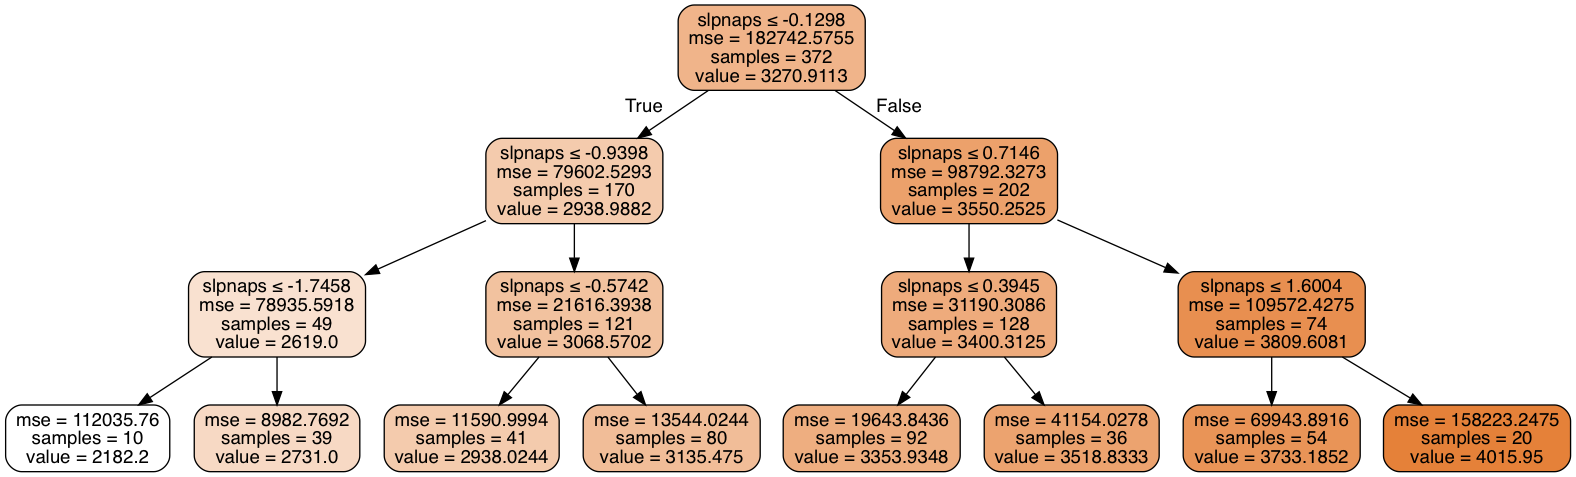

In [221]:
dot_data = StringIO()
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [226]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5], 
          'max_features':[2,3,4], 
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
         'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   29.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [2, 3, 4], 'max_leaf_nodes': [5, 6, 7], 'min_samples_split': [3, 4], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [227]:
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=4, max_leaf_nodes=7, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


best parameters {'max_features': 4, 'max_leaf_nodes': 7, 'min_samples_split': 4, 'n_estimators': 100, 'max_depth': 5}


best score 0.41510366195


In [231]:
y_pred_rfdtr= rfr_best.predict(X_test)
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 84490.36, test data: 105929.97
R^2 Random Forest Regression tree train data: 0.54, test data: 0.44


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

Based on the MSE and the R^2, the Lasso and the Elastic net perform the best. This is because when we fit the training model to the test model, we predict 74.1% of the variation, as compared to the 73.6% from the ridge regression, and 73.1% from the OLS. This is despite having nearly identical loss functions for the training set. This indicates that there was overfitting in the ridge model that the lasso and elastic net methods account for by weighting unnecessary predictors. 

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Yes. We can tell that there is a bias and variance trade-off in these models because we get slightly different fits depending on which model we use. The ridge regression may have had a better fit in the training dataset, but when fit against the testing dataset the difference in R^2 was larger compared to the difference in training and testing fits for lasso and elastic net. Lasso addresses overfitting by weighting unnessary predictors which effectively takes them out of the specification and avoiding the over-fitting problem. And so, when using the lasso model we are trading off variance (from overfitting) for bias (less predictors). The ridge regression keeps each predictor in the specification which trades-off bias (under-fitting) and risks the variance issue (too many predictors).

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: Since the Lasso, and the elastic net methods both weight unnecesary predictors, we are trading off variance for bias. That is, since we are treating some predictors as weighting little, we are effectively removing them, and so our model is treated as one with less predictors. This risks bias because a small amount of variables risks under-explanatory power. 